Упражнение 16.1

In [25]:
from math import sqrt
import math
import random

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

src = np.sqrt(np.array([1, 2, 3]))

print(src)

seq1 = np.arange(-1, 1.25, 0.25)
seq2 = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]


########## Library #############
import contextlib

@contextlib.contextmanager
def printoptions(*args, **kwargs):
    original = np.get_printoptions()
    np.set_printoptions(*args, **kwargs)
    try:
        yield
    finally: 
        np.set_printoptions(**original)
########## Library #############



[1.         1.41421356 1.73205081]


Упражнение 24.2

$$
f(x) =
\begin{cases}
x^2, & x \leq -3 \\
x^3, & -3 < x < 3 \\
2x + 1, & x \geq 3
\end{cases}
$$

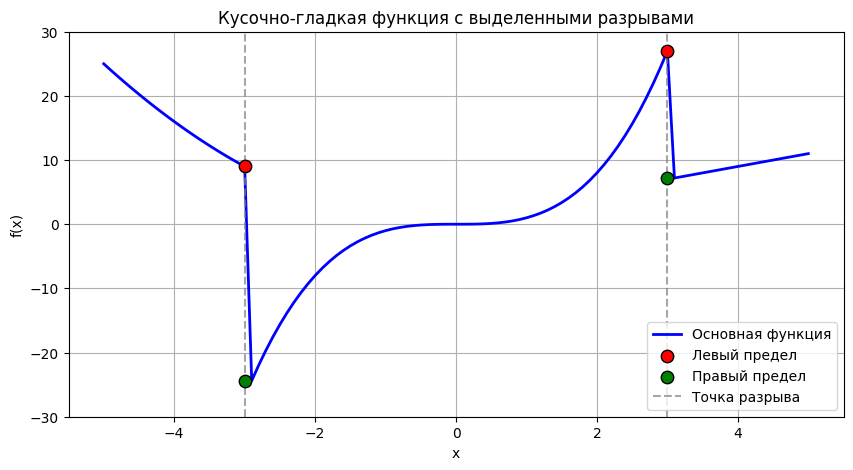

In [26]:

x = np.arange(-5, 5.1, 0.1)

second_and_third_conditions = np.where(x <= 3, x**3, 2*x + 1)

f = np.where(x <= -3, x**2, second_and_third_conditions)

f[(x == -3) | (x == 3)] = np.nan

plt.figure(figsize=(10, 5))
plt.plot(x, f, color='blue', linewidth=2, label='Основная функция')

break_points = [-3, 3]
colors = ['red', 'green']

for point in break_points:
    left_limit = x[x < point][-1]  # Последнее значение слева от точки
    left_value = f[x == left_limit][0]
    plt.scatter(point, left_value, color=colors[0], s=80, zorder=5, 
                edgecolors='black', label='Левый предел' if point == -3 else "")
    
    right_limit = x[x > point][0]  # Первое значение справа от точки
    right_value = f[x == right_limit][0]
    plt.scatter(point, right_value, color=colors[1], s=80, zorder=5,
                edgecolors='black', label='Правый предел' if point == -3 else "")

plt.vlines(break_points, ymin=-30, ymax=30, colors='gray', 
           linestyles='dashed', alpha=0.7, label='Точка разрыва')
plt.title('Кусочно-гладкая функция с выделенными разрывами')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.ylim(-30, 30)
plt.legend()
plt.show()


Упражнение 24.3
$$
\pi = 4 \sum_{i=0}^n \frac{(-1)^i}{2i+1}
$$

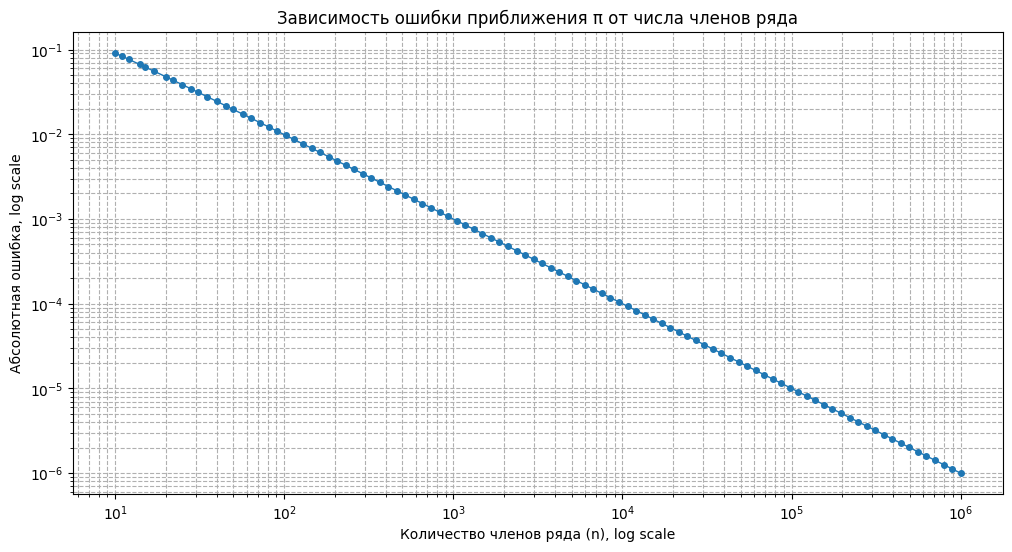

In [32]:
n_values = np.logspace(1, 6, num=100, dtype=np.int64)  # До 10⁶ для демонстрации

errors = []
for n in n_values:
    i = np.arange(n + 1)
    terms = (-1)**i / (2*i + 1) 
    pi_approx = 4 * np.sum(terms)
    errors.append(abs(pi_approx - math.pi))

plt.figure(figsize=(12, 6))
plt.loglog(n_values, errors, marker='o', markersize=4, linestyle='-', linewidth=1)
plt.title('Зависимость ошибки приближения π от числа членов ряда')
plt.xlabel('Количество членов ряда (n), log scale')
plt.ylabel('Абсолютная ошибка, log scale')
plt.grid(True, which='both', linestyle='--')
plt.show()

Упражнение 16.4

In [34]:
alphabet = map(chr, range(ord("a"), ord("z")))
print(*alphabet)

a b c d e f g h i j k l m n o p q r s t u v w x y


Упражнение 16.5

In [41]:

num_matrices = 5 
matrices = np.random.randint(1, 10, (2, ) * 5)
with printoptions(precision=3, suppress=True):
    print(matrices)

elements_22 = np.array([])
for matrix in matrices:
    elements_22 = np.append(elements_22, matrix[1][1])

vector_11_12 = np.array([])
for matrix in matrices:
    vector_11_12 = np.append(vector_11_12, matrix[0][0:2])

with printoptions():
    print("Список элементов (2,2):", elements_22)
    print("Вектор (1,1) и (1,2):", vector_11_12)

[[[[[9 2]
    [1 2]]

   [[7 3]
    [2 7]]]


  [[[2 3]
    [7 4]]

   [[1 5]
    [9 8]]]]



 [[[[9 9]
    [7 4]]

   [[5 1]
    [1 3]]]


  [[[8 2]
    [4 2]]

   [[5 9]
    [1 5]]]]]
Список элементов (2,2): [1. 5. 9. 8. 5. 9. 1. 5.]
Вектор (1,1) и (1,2): [9. 2. 1. 2. 7. 3. 2. 7. 9. 9. 7. 4. 5. 1. 1. 3.]


Упражнение 16.6

In [30]:
five_dim_array = np.random.randint(0, 100, size=(2, 3, 4, 5, 6))

list_4d = [five_dim_array[i] for i in range(five_dim_array.shape[0])]

list_of_lists_3d = [
    [five_dim_array[i, j] for j in range(five_dim_array.shape[1])] 
    for i in range(five_dim_array.shape[0])
]

with printoptions(precision=3, suppress=True):
    print("Исходный массив:", five_dim_array.shape)      
    print("Первый элемент 4D списка:", list_4d[0].shape)    
    print("Первый элемент 3D структуры:", list_of_lists_3d[0][0].shape) 

Исходный массив: (2, 3, 4, 5, 6)
Первый элемент 4D списка: (3, 4, 5, 6)
Первый элемент 3D структуры: (4, 5, 6)


Упражнение 16.7

In [31]:

# x_grid = np.linspace(-10, 10, 400)
# y_grid = np.linspace(-10, 10, 400)
# X, Y = np.meshgrid(x_grid, y_grid)
# Z = X**2 + Y**2

# A = np.array([[2, 1], 
#               [1, 3]])
# b = np.array([5, 7])

# det_A = np.linalg.det(A)

# plt.figure(figsize=(10, 8))

# contour = plt.contour(X, Y, Z, 20, cmap=cm.viridis)
# plt.colorbar(contour, label='f(x, y) values')

# x_vals = np.linspace(-10, 10, 100)

# colors = ['red', 'blue']
# labels = []

# for i in range(A.shape[0]):
#     if A[i, 1] != 0: 
#         y_vals = (b[i] - A[i, 0] * x_vals) / A[i, 1]
#         plt.plot(x_vals, y_vals, color=colors[i], linestyle='-', linewidth=2)
#         labels.append(f"{A[i, 0]}x + {A[i, 1]}y = {b[i]}")
#     else:  
#         x_val = b[i] / A[i, 0]
#         plt.axvline(x=x_val, color=colors[i], linestyle='-', linewidth=2)
#         labels.append(f"{A[i, 0]}x = {b[i]}")

# if abs(det_A) < 1e-10: 
#     rank_A = np.linalg.matrix_rank(A)
#     rank_augmented = np.linalg.matrix_rank(np.column_stack((A, b)))
    
#     if rank_A == rank_augmented:
#         plt.title("Система имеет бесконечно много решений (прямые совпадают)")
#     else:
#         plt.title("Система не имеет решений (прямые параллельны)")
# else:
#     intersection = np.linalg.solve(A, b)
#     x_int, y_int = intersection
    
#     # Plot the intersection point
#     plt.plot(x_int, y_int, 'ko', markersize=8)
#     plt.text(x_int + 0.2, y_int + 0.2, f'Intersection ({x_int:.2f}, {y_int:.2f})',
#              fontsize=12, verticalalignment='bottom')
    
#     # Add function value at intersection
#     z_int = x_int**2 + y_int**2  # Use your actual function here
#     plt.title(f"Точка пересечения: ({x_int:.2f}, {y_int:.2f}), f(x,y) = {z_int:.2f}")

# plt.legend(labels)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.grid(True)
# plt.axis('equal')

# plt.show()